In [1]:
import numpy as np
from scipy import signal
from skimage.transform import resize
from skimage.io import imread
from scipy.ndimage import filters
from skimage.transform import pyramid_gaussian
from echo_lv.lv import get_contour_points, area2cont
from echo_lv.data import LV_EKB_Dataset
from skimage.io import imsave
import matplotlib.pyplot as plt

ekb = LV_EKB_Dataset(img_size=(512,512))

Dataset is correct.


In [11]:
n = int(input())
cities = {}
for i in range(1, n+1):
    cities[i] = [int(j) for j in input().split(' ')]
k = int(input())
c1, c2 = map(int, input().split(' '))

 7
 0 0
 0 2
 2 2
 0 -2
 2 -2
 2 -1
 2 1
 2
 1 3


In [48]:
cities

{2: [0, 2], 3: [2, 2], 4: [0, -2], 5: [2, -2], 6: [2, -1], 7: [2, 1]}

In [46]:
def find_roads(cities, cur_loc, num, fuel):
    cur_nums = []
    for key, value in cities.items():
        if abs(cur_loc[0] - value[0]) + abs(cur_loc[1] - value[1]) <= fuel:
            cur_nums.append(key)
    
    if num in cur_nums:
        return 1
    
    cur_locs = []
    for num in cur_nums:
        cur_locs.append(cities.pop(num))
    
    counts = []
    for new_cur_loc in cur_locs:
        c = find_roads(cities.copy(), new_cur_loc, num, fuel)
        if c == -1:
            return -1
        else:
            counts.append(c)
        
    if counts:
        return min(counts) + 1
    return -1
    

In [27]:
from_city = cities.pop(c1)

In [37]:
from_city

[0, 0]

In [36]:
cities

{2: [0, 2], 3: [2, 2], 4: [0, -2], 5: [2, -2], 6: [2, -1], 7: [2, 1]}

In [47]:
find_cities(cities.copy(), from_city, c2, k)

{2: [0, 2], 3: [2, 2], 4: [0, -2], 5: [2, -2], 6: [2, -1], 7: [2, 1]} [0, 0]
{3: [2, 2], 5: [2, -2], 6: [2, -1], 7: [2, 1]} [0, 2]


-1

In [55]:
cities.pop(c1)
for 
# cities.insert(c1, None)
# city2 = cities[c2]
# def 
# while

AttributeError: 'dict' object has no attribute 'delete'

In [34]:
n = int(input())
seq = n * '(' + n * ')'
print(seq)
for i in range(n-1, 0, -1):
#     if i != n-1:
        
    for j in range(n, 2*n-1):
        print(seq[:i] + ')' + seq[i+1:j] + '(' + seq[j+1:])


 3


((()))
(()())
(())()
()(())
()()()


In [42]:
s1 = input()
s2 = input()

ds1 = dict()
ds2 = dict()
for i in s1:
    if not i in ds1:
        ds1[i] = 0
    else:
        ds1[i] += 1
        
for i in s2:
    if not i in ds2:
        ds2[i] = 0
    else:
        ds2[i] += 1

if ds1 == ds2:
    print(ok)
else:
    print(2)

 rtfdg
 rtfgd


NameError: name 'ok' is not defined

In [41]:
ds1

{'d': 2, 'f': 2, 's': 1}

In [2]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')

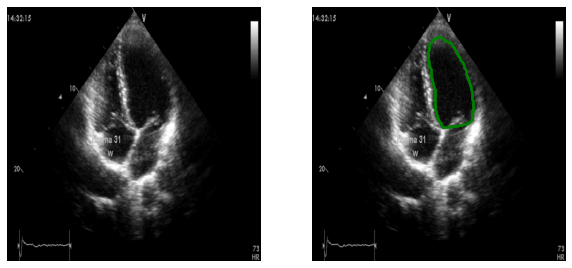

In [3]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imgs[0], cmap=plt.cm.gray)
plt.axis('Off')
plt.subplot(122)
plt.imshow(imgs[0], cmap=plt.cm.gray)
cont_x, cont_y = np.where(area2cont(msks[0]) != 0)
plt.scatter(cont_y, cont_x, s=5, color='g', marker='.')
plt.axis('Off')
plt.savefig('us.png', bbox_inches='tight', pad_inches=0)

In [4]:
def window_image(img, cent_point, window):
    y0 = int(np.round(cent_point[0]) - window // 2)
    y1 = int(np.round(cent_point[0]) + window // 2 + 1)
    x0 = int(np.round(cent_point[1]) - window // 2)
    x1 = int(np.round(cent_point[1]) + window // 2 + 1)
    if x0 < 0:
        x0 = 0
    if y0 < 0:
        y0 = 0
    if y1 > img.shape[0]:
        y1 = img.shape[0]
    if x1 > img.shape[1]:
        x1 = img.shape[1]    
    img = img[y0:y1, x0:x1]
    if img.shape[0] != window:
        if y0 == 0:
            img = np.concatenate((np.zeros((window - img.shape[0], img.shape[1])), img), axis=0)
        elif y1 == img.shape[0]:
            img = np.concatenate((img, np.zeros((window - img.shape[0], img.shape[1]))), axis=0)
    if img.shape[1] != window:
        if x0 == 0:
            img = np.concatenate((np.zeros((img.shape[0], window - img.shape[1])), img), axis=1)
        elif x1 == img.shape[1]:
            img = np.concatenate((img, np.zeros((img.shape[0], window - img.shape[1]))), axis=1)
    return img

In [5]:
cont_x, cont_y, *_ = get_contour_points(msks[0], kind='contour', num = 9) 
points = [(y, x) for x, y in zip(cont_x, cont_y)]
index = 0

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


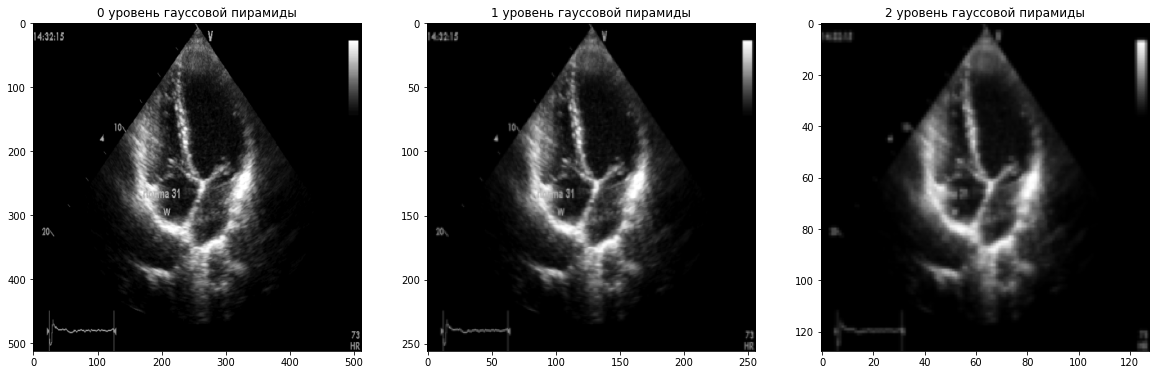

In [6]:
layers = 2
r_1_imgs = pyramid_gaussian(imgs[0], max_layer=layers)
r_2_imgs = pyramid_gaussian(imgs[1], max_layer=layers)
r_1_imgs = list(r_1_imgs)
r_2_imgs = list(r_2_imgs)
plt.figure(figsize=(20,10))
for i, img in enumerate(r_1_imgs):
    plt.subplot(1,len(r_1_imgs),i+1)
    plt.imshow(img, cmap=plt.cm.gist_gray)
    plt.title(str(i) + ' уровень гауссовой пирамиды')
plt.savefig('optical_flow/gauss_pyramid.png', bbox_inches='tight', pad_inches=0)

In [7]:
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('21', 'Norma_Old')
imgs, msks = ekb.get_sequence('05', 'DKMP')

layers = 2
window = 61

cont_x, cont_y, *_ = get_contour_points(msks[0], kind='contour', num = 9) 
points = [(y, x) for x, y in zip(cont_x, cont_y)]
of = [points]

for ind in range(0, len(imgs)-1):
    r_1_imgs = list(pyramid_gaussian(imgs[ind], max_layer=layers))
    r_2_imgs = list(pyramid_gaussian(imgs[ind+1], max_layer=layers))
    new_points = []
    for point in points:
        flow = np.array([[0], [0]])
        for l, (img_1, img_2) in enumerate(zip(r_1_imgs[::-1], r_2_imgs[::-1])):

            img1 = window_image(img_1, (point[0] / 2 ** (layers - l), 
                                        point[1] / 2 ** (layers - l)), window)
            img2 = window_image(img_2, ((point[0] + flow[1]) / 2 ** (layers - l), 
                                        (point[1] + flow[0]) / 2 ** (layers - l)), window)

            f_y, f_x = np.gradient(img1)
            f_t = img1 - img2
            A = np.array([[np.sum(f_x ** 2), np.sum(f_x * f_y)],
                         [np.sum(f_x * f_y), np.sum(f_y ** 2)]])
            B = np.array([[np.sum(f_x * f_t)],
                        [np.sum(f_y * f_t)]
                         ])
            solv_flow = np.matmul(np.linalg.inv(A), B)
            flow = 2*(flow + solv_flow)
        new_points.append((point[0] + int(flow[1]), point[1] + int(flow[0])))
    points = new_points
    of.append(points)


## Примеры использования 

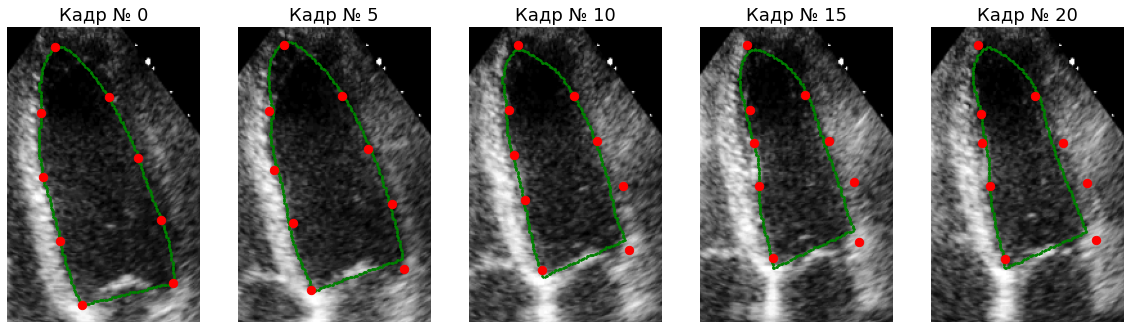

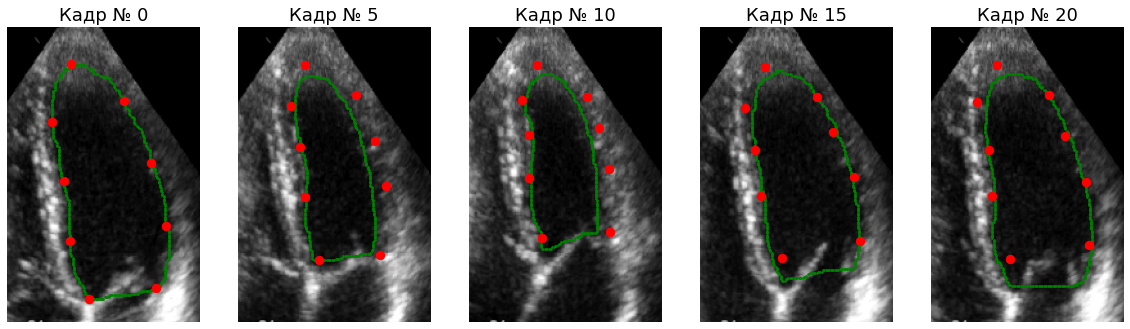

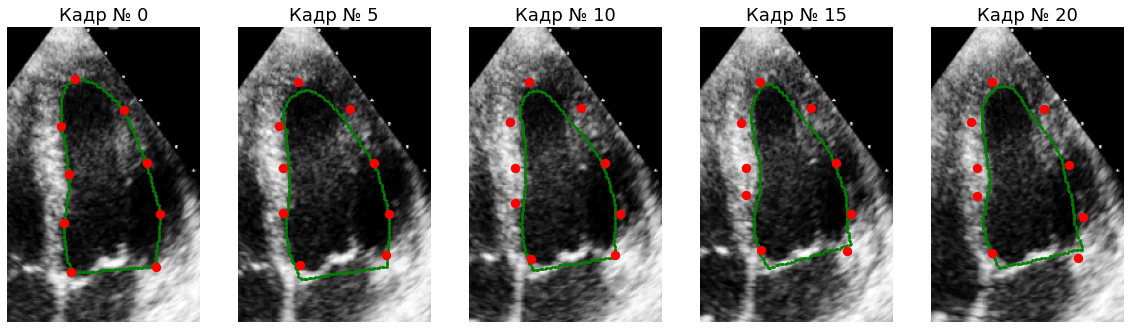

In [11]:
from echo_lv.segmentation.optical_flow import LucasKanade
# print(index)

step = 5
lk = LucasKanade(gauss_layers=2, window=61)
for p_i, obj in enumerate([{'pat' : '04', 'cat' : 'Norma'}, {'pat' : '21', 'cat' : 'Norma_Old'}, {'pat' : '05', 'cat' : 'DKMP'}]):
    plt.figure(figsize=(20,10))
    imgs, msks = ekb.get_sequence(obj['pat'], obj['cat'])
    cont_x, cont_y, *_ = get_contour_points(area2cont(msks[0]), kind='contour', num = 9)
    points = [(y, x) for x, y in zip(cont_x, cont_y)]
    results = lk.get_points(imgs, points)
    for i, (img, msk) in enumerate(zip(imgs[::step], msks[::step])):
        plt.subplot(1, 5, i+1)
        cont_x, cont_y = np.where(area2cont(msk) != 0)

        x = [p[1] for p in results[step*i]]
        y = [p[0] for p in results[step*i]]
        plt.imshow(imgs[step*i], cmap=plt.cm.gray)
        plt.scatter(cont_y, cont_x, s=10, color='g', marker='.')
        plt.scatter(x, y, s=70, color='r', marker='o')
        if p_i == 0:
            plt.xlim(215, 365)
            plt.ylim(130, 360)
        elif p_i == 1:
            plt.xlim(200, 350)
            plt.ylim(30, 260)
        elif p_i == 2:
            plt.xlim(225, 375)
            plt.ylim(105, 335)

        plt.gca().invert_yaxis()
        plt.axis('off')
        plt.title('Кадр № ' + str(step*i), fontsize=18)
        if i == 4:
            break
    plt.savefig('optical_flow/result_optical_flow_'+str(p_i + 1) +'.png', bbox_inches='tight', pad_inches=0)

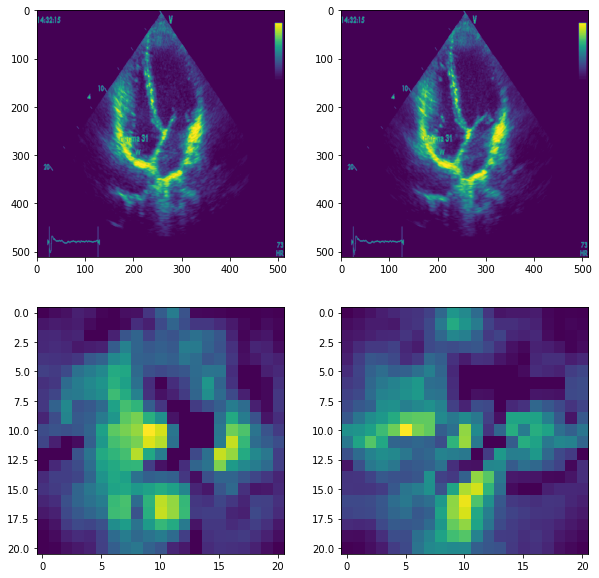

In [209]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(img_1)
# plt.scatter(point[1] / 2 ** (layers - l), point[0] / 2 ** (layers - l), color='r')
# plt.scatter(point[1], point[0], color='r')
plt.subplot(222)
plt.imshow(img_2)
# plt.scatter(point[1] + flow[1], point[0] + flow[0], color='r')
plt.subplot(223)
plt.imshow(img1)

plt.subplot(224)
plt.imshow(img2)

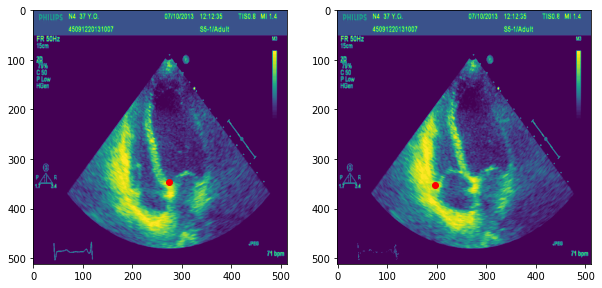

In [199]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_1)
plt.scatter(point[1], point[0], color='r')
plt.subplot(122)
plt.imshow(img_2)
plt.scatter(point[1] + flow[1], point[0] + flow[0], color='r')

In [ ]:
import numpy as np
import scipy.ndimage


def poly_exp(f, c, sigma):
    """
    Calculates the local polynomial expansion of a 2D signal, as described by Farneback
    Uses separable normalized correlation
    $f ~ x^T A x + B^T x + C$
    If f[i, j] and c[i, j] are the signal value and certainty of pixel (i, j) then
    A[i, j] is a 2x2 array representing the quadratic term of the polynomial, B[i, j]
    is a 2-element array representing the linear term, and C[i, j] is a scalar
    representing the constant term.
    Parameters
    ----------
    f
        Input signal
    c
        Certainty of signal
    sigma
        Standard deviation of applicability Gaussian kernel
    Returns
    -------
    A
        Quadratic term of polynomial expansion
    B
        Linear term of polynomial expansion
    C
        Constant term of polynomial expansion
    """
    # Calculate applicability kernel (1D because it is separable)
    n = int(4*sigma + 1)
    x = np.arange(-n, n + 1, dtype=np.int)
    a = np.exp(-x**2 / (2 * sigma**2))  # a: applicability kernel [n]

    # b: calculate b from the paper. Calculate separately for X and Y dimensions
    # [n, 6]
    bx = np.stack([
        np.ones(a.shape),
        x,
        np.ones(a.shape),
        x**2,
        np.ones(a.shape),
        x
    ], axis=-1)
    by = np.stack([
        np.ones(a.shape),
        np.ones(a.shape),
        x,
        np.ones(a.shape),
        x**2,
        x,
    ], axis=-1)

    # Pre-calculate product of certainty and signal
    cf = c * f

    # G and v are used to calculate "r" from the paper: v = G*r
    # r is the parametrization of the 2nd order polynomial for f
    G = np.empty(list(f.shape) + [bx.shape[-1]]*2)
    v = np.empty(list(f.shape) + [bx.shape[-1]])

    # Apply separable cross-correlations

    # Pre-calculate quantities recommended in paper
    ab = np.einsum('i,ij->ij', a, bx)
    abb = np.einsum('ij,ik->ijk', ab, bx)

    # Calculate G and v for each pixel with cross-correlation
    for i in range(bx.shape[-1]):
        for j in range(bx.shape[-1]):
            G[..., i, j] = scipy.ndimage.correlate1d(c, abb[..., i, j], axis=0, mode='constant', cval=0)

        v[..., i] = scipy.ndimage.correlate1d(cf, ab[..., i], axis=0, mode='constant', cval=0)

    # Pre-calculate quantities recommended in paper
    ab = np.einsum('i,ij->ij', a, by)
    abb = np.einsum('ij,ik->ijk', ab, by)

    # Calculate G and v for each pixel with cross-correlation
    for i in range(bx.shape[-1]):
        for j in range(bx.shape[-1]):
            G[..., i, j] = scipy.ndimage.correlate1d(G[..., i, j], abb[..., i, j], axis=1, mode='constant', cval=0)

        v[..., i] = scipy.ndimage.correlate1d(v[..., i], ab[..., i], axis=1, mode='constant', cval=0)

    # Solve r for each pixel
    r = np.linalg.solve(G, v)

    # Quadratic term
    A = np.empty(list(f.shape) + [2, 2])
    A[..., 0, 0] = r[..., 3]
    A[..., 0, 1] = r[..., 5] / 2
    A[..., 1, 0] = A[..., 0, 1]
    A[..., 1, 1] = r[..., 4]

    # Linear term
    B = np.empty(list(f.shape) + [2])
    B[..., 0] = r[..., 1]
    B[..., 1] = r[..., 2]

    # constant term
    C = r[..., 0]

    # b: [n, n, 6]
    # r: [f, f, 6]
    # f: [f, f]
    # e = b*r - f

    return A, B, C


def flow_iterative(
    f1, f2, sigma, c1, c2, sigma_flow, num_iter=1, d=None, model='constant', mu=None
):
    """
    Calculates optical flow with an algorithm described by Gunnar Farneback
    Parameters
    ----------
    f1
        First image
    f2
        Second image
    sigma
        Polynomial expansion applicability Gaussian kernel sigma
    c1
        Certainty of first image
    c2
        Certainty of second image
    sigma_flow
        Applicability window Gaussian kernel sigma for polynomial matching
    num_iter
        Number of iterations to run (defaults to 1)
    d: (optional)
        Initial displacement field
    p: (optional)
        Initial global displacement model parameters
    model: ['constant', 'affine', 'eight_param']
        Optical flow parametrization to use
    mu: (optional)
        Weighting term for usage of global parametrization. Defaults to
        using value recommended in Farneback's thesis
    Returns
    -------
    d
        Optical flow field. d[i, j] is the (y, x) displacement for pixel (i, j)
    """

    # TODO: add initial warp parameters as optional input?

    # Calculate the polynomial expansion at each point in the images
    A1, B1, C1 = poly_exp(f1, c1, sigma)
    A2, B2, C2 = poly_exp(f2, c2, sigma)

    # Pixel coordinates of each point in the images
    x = np.stack(np.broadcast_arrays(
        np.arange(f1.shape[0])[:, None],
        np.arange(f1.shape[1])
    ), axis=-1).astype(np.int)

    # Initialize displacement field
    if d is None:
        d = np.zeros(list(f1.shape) + [2])

    # Set up applicability convolution window
    n_flow = int(4*sigma_flow + 1)
    xw = np.arange(-n_flow, n_flow + 1)
    w = np.exp(-xw**2 / (2 * sigma_flow**2))

    # Evaluate warp parametrization model at pixel coordinates
    if model == 'constant':
        S = np.eye(2)

    elif model in ('affine', 'eight_param'):
        S = np.empty(list(x.shape) + [6 if model == 'affine' else 8])

        S[..., 0, 0] = 1
        S[..., 0, 1] = x[..., 0]
        S[..., 0, 2] = x[..., 1]
        S[..., 0, 3] = 0
        S[..., 0, 4] = 0
        S[..., 0, 5] = 0

        S[..., 1, 0] = 0
        S[..., 1, 1] = 0
        S[..., 1, 2] = 0
        S[..., 1, 3] = 1
        S[..., 1, 4] = x[..., 0]
        S[..., 1, 5] = x[..., 1]

        if model == 'eight_param':
            S[..., 0, 6] = x[..., 0] ** 2
            S[..., 0, 7] = x[..., 0] * x[..., 1]

            S[..., 1, 6] = x[..., 0] * x[..., 1]
            S[..., 1, 7] = x[..., 1] ** 2

    else:
        raise ValueError('Invalid parametrization model')

    S_T = S.swapaxes(-1, -2)

    # Iterate convolutions to estimate the optical flow
    for _ in range(num_iter):
        # Set d~ as displacement field fit to nearest pixel (and constrain to not
        # being off image). Note we are setting certainty to 0 for points that
        # would have been off-image had we not constrained them
        d_ = d.astype(np.int)
        x_ = x + d_

        # x_ = np.maximum(np.minimum(x_, np.array(f1.shape) - 1), 0)

        # Constrain d~ to be on-image, and find points that would have
        # been off-image
        x_2 = np.maximum(np.minimum(x_, np.array(f1.shape) - 1), 0)
        off_f = np.any(x_ != x_2, axis=-1)
        x_ = x_2

        # Set certainty to 0 for off-image points
        c_ = c1[x_[..., 0], x_[..., 1]]
        c_[off_f] = 0

        # Calculate A and delB for each point, according to paper
        A = (A1 + A2[x_[..., 0], x_[..., 1]]) / 2
        A *= c_[..., None, None]  # recommendation in paper: add in certainty by applying to A and delB

        delB = -1/2 * (B2[x_[..., 0], x_[..., 1]] - B1) + (A @ d_[..., None])[..., 0]
        delB *= c_[..., None]  # recommendation in paper: add in certainty by applying to A and delB

        # Pre-calculate quantities recommended by paper
        A_T = A.swapaxes(-1, -2)
        ATA = S_T @ A_T @ A @ S
        ATb = (S_T @ A_T @ delB[..., None])[..., 0]
        # btb = delB.swapaxes(-1, -2) @ delB

        # If mu is 0, it means the global/average parametrized warp should not be
        # calculated, and the parametrization should apply to the local calculations
        if mu == 0:
            # Apply separable cross-correlation to calculate linear equation
            # for each pixel: G*d = h
            G = scipy.ndimage.correlate1d(ATA, w, axis=0, mode='constant', cval=0)
            G = scipy.ndimage.correlate1d(G, w, axis=1, mode='constant', cval=0)

            h = scipy.ndimage.correlate1d(ATb, w, axis=0, mode='constant', cval=0)
            h = scipy.ndimage.correlate1d(h, w, axis=1, mode='constant', cval=0)

            d = (S @ np.linalg.solve(G, h)[..., None])[..., 0]

        # if mu is not 0, it should be used to regularize the least squares problem
        # and "force" the background warp onto uncertain pixels
        else:
            # Calculate global parametrized warp
            G_avg = np.mean(ATA, axis=(0, 1))
            h_avg = np.mean(ATb, axis=(0, 1))
            p_avg = np.linalg.solve(G_avg, h_avg)
            d_avg = (S @ p_avg[..., None])[..., 0]

            # Default value for mu is to set mu to 1/2 the trace of G_avg
            if mu is None:
                mu = 1/2 * np.trace(G_avg)

            # Apply separable cross-correlation to calculate linear equation
            G = scipy.ndimage.correlate1d(A_T @ A, w, axis=0, mode='constant', cval=0)
            G = scipy.ndimage.correlate1d(G, w, axis=1, mode='constant', cval=0)

            h = scipy.ndimage.correlate1d((A_T @ delB[..., None])[..., 0], w, axis=0, mode='constant', cval=0)
            h = scipy.ndimage.correlate1d(h, w, axis=1, mode='constant', cval=0)

            # Refine estimate of displacement field
            d = np.linalg.solve(G + mu*np.eye(2), h + mu*d_avg)

    # TODO: return global displacement parameters and/or global displacement if mu != 0

    return d


[-0.22823] [0.50044456]


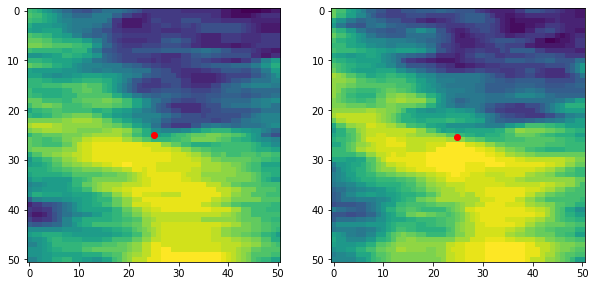

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img1)
plt.scatter(window // 2, window // 2, color='r')

plt.subplot(122)
plt.imshow(img2)
plt.scatter(window// 2 + u, w // 2 + v, color='r')

In [ ]:
for i in range(0, img1.shape[0]):
    for j in range(0, img2.shape[1]):
        Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
        Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
        It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
        #b = ... # get b here
        #A = ... # get A here
        # if threshold τ is larger than the smallest eigenvalue of A'A:
        nu = ... # get velocity here
        u[i,j]=nu[0]
        v[i,j]=nu[1]

In [ ]:
def optical_flow(I1g, I2g, window_size, tau=1e-2):
 
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    w = window_size/2 # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)
    ft = signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) +
         signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = ft[i-w:i+w+1, j-w:j+w+1].flatten()
            #b = ... # get b here
            #A = ... # get A here
            # if threshold τ is larger than the smallest eigenvalue of A'A:
            nu = ... # get velocity here
            u[i,j]=nu[0]
            v[i,j]=nu[1]
 
    return (u,v)